In [44]:
import pandas as pd
import matplotlib.pyplot as plt
jeopardy_path = "JEOPARDY_CSV.csv"
jeopardy_df = pd.read_csv(jeopardy_path)
jeopardy_df

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


a.

There are 216930 rows, each row represents all the different questions asked in each episode and their answers, the grain would be the value of each question in every category on specific dates

b. It needs editing before it can be easily accessed, and easy to understand

In [24]:
jeopardy_df[' Air Date']= pd.to_datetime(jeopardy_df[' Air Date'])
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


c.

In [36]:
jeopardy_df['year']= pd.DatetimeIndex(jeopardy_df[' Air Date']).year
shows_per_year= jeopardy_df.groupby('year')[['Show Number']].nunique()
shows_per_year.head()

,Show Number
year,
1984,23
1985,16
1986,25
1987,22
1988,22


d.

In [40]:
top_5_categories= jeopardy_df[' Category'].value_counts().head()
top_5_categories

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name:  Category, dtype: int64

e. Most shows in November

In [39]:
jeopardy_df['month']= pd.DatetimeIndex(jeopardy_df[' Air Date']).month
shows_per_month= jeopardy_df.groupby('month')[['Show Number']].nunique()
shows_per_month.sort_values('Show Number', ascending= False)

,Show Number
month,
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293


f.

In [9]:
jeopardy_df[" Answer"].value_counts()

China                             216
Australia                         215
Japan                             196
Chicago                           194
France                            193
                                 ... 
the Hopis                           1
free parking                        1
Lady Diana Spencer                  1
trailer park                        1
Grigori Alexandrovich Potemkin      1
Name:  Answer, Length: 88236, dtype: int64

In [12]:
jeopardy_df[jeopardy_df[" Answer"]=="China"][[" Question"]]


,Question
598,In 1958 this country launched its second 5-yea...
1507,"In 1999 this country began 3 ""golden weeks"" of..."
3050,P.F. Chang's is an upscale bistro specializing...
3476,This country's National People's Congress has ...
5990,"Of the 6 nations India borders, this one is th..."
...,...
214506,Principal mountain ranges in this large countr...
215115,Dr. Sun Yat-Sen
215556,Tsingtao
215912,"Because of a policy adopted in 1979, this coun..."


In [13]:
jeopardy_df[jeopardy_df[" Answer"]=="Australia"][[" Question"]]

,Question
560,A 1994 festival honoring this country featured...
688,Large aboriginal populations live in this coun...
1236,Papua New Guinea is just off this country's Ca...
3175,In 1962 this country's Dawn Fraser became the ...
4373,"It's the lowest, flattest & smallest continent"
...,...
212513,The good folk at gdaypubs.com are making a maj...
212711,Eons of wind & rain have worn away ancient mtn...
213583,Dedicated to upholding this nation's constitut...
214876,If you stay at Cradle Mountain Lodge in this c...


In [14]:
jeopardy_df[jeopardy_df[" Answer"]=="Japan"][[" Question"]]

,Question
404,In February 1904 this country attacked the Rus...
874,Sanma aisu is fish-flavored ice cream & taco a...
1864,The monster seen here (Godzilla) originally ap...
3106,The mauve flowers of the Paulownia tree adorn ...
4080,This country's 12th century sculptor Unkei is ...
...,...
211129,"On Feb. 8, 1904 this country attacked Port Art..."
214711,"This nation's maritime self-defense force, suc..."
215513,"On July 8, 1853 Matthew Perry presented a lett..."
215568,Kirin


2.

Text(0.5, 1.0, 'Most Common Categories')

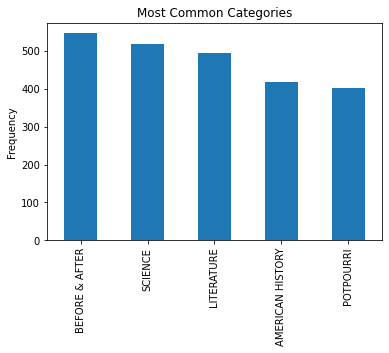

In [49]:
top_5_categories.plot(kind= 'bar')
plt.ylabel('Frequency')
plt.title('Most Common Categories')
